<a href="https://colab.research.google.com/github/VeerrajuP/Veerraju_INFO5731_Fall2021/blob/master/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [25]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

In [26]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [27]:
import spacy

In [28]:
!pip install pyLDAvis

In [29]:
import pyLDAvis
import pyLDAvis.gensim_models

In [30]:
import pyLDAvis.gensim_models as gensimvis

In [31]:
from gensim import corpora, models
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [33]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
import pandas as pd
df = pd.read_csv('Analysist.csv')
df_data = df['Tweets']
df

,S.No.,Tweets
0,NaN,RT @angeladewan: First on CNN: Obama is expect...
1,NaN,RT @JesseKellyDC: The true believers in “clima...
2,NaN,"RT @OgbeniDipo: """"""""You can't ignore politics...."
3,NaN,RT @Amy_Siskind: Obama going hard at Trump wit...
4,NaN,RT @OccupyDemocrats: BREAKING: Former Presiden...
...,...,...
345,NaN,RT @OccupyDemocrats: BREAKING: Former Presiden...
346,NaN,RT @OccupyDemocrats: BREAKING: Former Presiden...
347,NaN,RT @Amy_Siskind: Obama going hard at Trump wit...
348,NaN,RT @BBCWorld: Barack Obama tells young people ...


In [39]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
df_data = list(sent_to_words(df_data))
print(df_data[:100])

[['rt', 'angeladewan', 'first', 'on', 'cnn', 'obama', 'is', 'expected', 'to', 'express', 'regret', 'for', 'trump', 'four', 'years', 'of', 'active', 'hostility', 'towards', 'climate', 'science'], ['rt', 'jessekellydc', 'the', 'true', 'believers', 'in', 'climate', 'change', 'are', 'so', 'much', 'more', 'embarrassing', 'than', 'obama', 'obama', 'just', 'uses', 'you', 'all', 'like', 'chumps', 'to'], ['rt', 'ogbenidipo', 'you', 'can', 'ignore', 'politics', 'while', 'protesting', 'and', 'hashtags', 'raise', 'awareness', 'you', 'should', 'get', 'involved', 'in', 'politics', 'at', 'some', 'leve'], ['rt', 'amy_siskind', 'obama', 'going', 'hard', 'at', 'trump', 'without', 'naming', 'him', 'in', 'his', 'glasgow', 'speech', 'noting', 'the', 'vacuum', 'of', 'us', 'leadership', 'on', 'the', 'world', 'stage'], ['rt', 'occupydemocrats', 'breaking', 'former', 'president', 'obama', 'rips', 'trump', 'on', 'the', 'world', 'stage', 'for', 'his', 'active', 'hostility', 'toward', 'climate', 'science'], ['rt'

In [44]:
bigram = gensim.models.Phrases(df_data, min_count=50, threshold=300)
trigram = gensim.models.Phrases(bigram[df_data], threshold=300)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[df_data[0]]])

['rt', 'angeladewan', 'first', 'on', 'cnn', 'obama', 'is', 'expected', 'to', 'express', 'regret', 'for', 'trump', 'four', 'years', 'of', 'active', 'hostility', 'towards', 'climate', 'science']


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [45]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


In [47]:
data_words_nostops = remove_stopwords(df_data)
data_words_bigrams = make_bigrams(data_words_nostops)
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:100])

[['expect', 'express', 'regret', 'trump', 'year', 'active', 'hostility', 'climate', 'science'], ['true', 'believer', 'climate', 'change', 'much', 'embarrassing', 'use', 'chump'], ['politic', 'protest', 'hashtag', 'raise', 'awareness', 'get', 'involved', 'politic', 'leve'], ['go', 'hard', 'trump', 'name', 'speech', 'note', 'vacuum', 'world', 'stage'], ['break', 'former', 'rip', 'trump', 'world', 'stage', 'active', 'hostility', 'climate', 'science'], ['note', 'effort', 'world', 'second', 'bad', 'climate', 'stall', 'pull'], ['ryancapperauld', 'blame', 'rise', 'nationalism', 'world', 'less', 'global', 'cooperation', 'environment', 'speech'], ['diss'], ['government', 'set', 'protect', 'interest', 'wealthy', 'substantial', 'change'], ['anywhere', 'political', 'scene', 'direct', 'business', 'anti', 'energy', 'concern', 'emission'], ['try', 'forget', 'co', 'clqaibt', 'wsjopinion'], ['give', 'lot', 'current', 'lifestyle', 'benefit', 'planet'], ['go', 'hard', 'trump', 'name', 'speech', 'note', '

In [50]:
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:20])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)], [(16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1)], [(7, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)], [(0, 1), (1, 1), (4, 1), (6, 1), (7, 1), (29, 1), (31, 1), (32, 1), (33, 1), (34, 1)], [(1, 1), (27, 1), (31, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1)], [(28, 1), (31, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1)], [(48, 1)], [(10, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1)], [(55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1)], [(64, 1), (65, 1), (66, 1), (67, 1), (68, 1)], [(69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1)], [(7, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)], [(0, 1), (1, 1), (4, 1), (6, 1), (7, 1), (29, 1), (31, 1), (32, 1), (33, 1), (34, 1)], [(69, 1), (70,

In [55]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=50,random_state=100,update_every=5,chunksize=100,passes=50,alpha='auto',per_word_topics=True)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(12,
  '0.048*"trump" + 0.048*"funny" + 0.048*"single" + 0.048*"seanhannity" + '
  '0.048*"report" + 0.048*"point" + 0.048*"right" + 0.048*"cage" + '
  '0.048*"vinylfan" + 0.001*"former"'),
 (48,
  '0.068*"co" + 0.068*"madisonsiriusxm" + 0.068*"glennkirschner" + '
  '0.001*"stage" + 0.001*"trump" + 0.001*"world" + 0.001*"former" + '
  '0.001*"climate" + 0.001*"active" + 0.001*"rip"'),
 (37,
  '0.042*"climate" + 0.042*"trump" + 0.042*"change" + 0.042*"act" + '
  '0.042*"come" + 0.042*"protest" + 0.042*"urge" + 0.042*"help" + 0.042*"co" + '
  '0.042*"probably"'),
 (44,
  '0.044*"rise" + 0.044*"million" + 0.044*"include" + 0.044*"bank" + '
  '0.044*"bail" + 0.044*"abandon" + 0.044*"wing" + 0.044*"word" + '
  '0.044*"story" + 0.044*"show"'),
 (5,
  '0.033*"think" + 0.033*"go" + 0.033*"obama" + 0.033*"powered" + '
  '0.033*"unilateral" + 0.033*"people" + 0.033*"take" + 0.033*"whine" + '
  '0.033*"nuclear" + 0.033*"audacity"'),
 (21,
  '0.063*"support" + 0.063*"today" + 0.063*"say" + 0.063*

In [56]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.280705141396457

Coherence Score:  0.3483964252921751


In [57]:
lDmodel = models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics = 50,random_state=100,update_every=5,chunksize=100,passes=50,alpha='auto',per_word_topics=True)

from pprint import pprint
pprint(lDmodel.print_topics())
IDM1 = lDmodel[corpus]

[(12,
  '0.048*"trump" + 0.048*"funny" + 0.048*"single" + 0.048*"seanhannity" + '
  '0.048*"report" + 0.048*"point" + 0.048*"right" + 0.048*"cage" + '
  '0.048*"vinylfan" + 0.001*"former"'),
 (48,
  '0.068*"co" + 0.068*"madisonsiriusxm" + 0.068*"glennkirschner" + '
  '0.001*"stage" + 0.001*"trump" + 0.001*"world" + 0.001*"former" + '
  '0.001*"climate" + 0.001*"active" + 0.001*"rip"'),
 (37,
  '0.042*"climate" + 0.042*"trump" + 0.042*"change" + 0.042*"act" + '
  '0.042*"come" + 0.042*"protest" + 0.042*"urge" + 0.042*"help" + 0.042*"co" + '
  '0.042*"probably"'),
 (44,
  '0.044*"rise" + 0.044*"million" + 0.044*"include" + 0.044*"bank" + '
  '0.044*"bail" + 0.044*"abandon" + 0.044*"wing" + 0.044*"word" + '
  '0.044*"story" + 0.044*"show"'),
 (5,
  '0.033*"think" + 0.033*"go" + 0.033*"obama" + 0.033*"powered" + '
  '0.033*"unilateral" + 0.033*"people" + 0.033*"take" + 0.033*"whine" + '
  '0.033*"nuclear" + 0.033*"audacity"'),
 (21,
  '0.063*"support" + 0.063*"today" + 0.063*"say" + 0.063*

In [58]:
lSamodel = models.LsiModel(corpus, num_topics = 50, id2word = id2word)
pprint(lSamodel.print_topics(num_topics = 50))

[(0,
  '0.348*"climate" + 0.338*"trump" + 0.332*"world" + 0.319*"stage" + '
  '0.316*"former" + 0.306*"hostility" + 0.306*"active" + 0.297*"science" + '
  '0.285*"break" + 0.284*"rip"'),
 (1,
  '-0.400*"say" + -0.370*"life" + -0.364*"vote" + -0.363*"depend" + '
  '-0.360*"barack" + -0.244*"people" + -0.224*"young" + -0.198*"cop" + '
  '-0.192*"address" + -0.183*"former"'),
 (2,
  '0.516*"lot" + 0.396*"give" + 0.373*"current" + 0.370*"lifestyle" + '
  '0.340*"planet" + 0.340*"benefit" + 0.138*"leave" + 0.132*"still" + '
  '0.132*"ove" + 0.050*"climate"'),
 (3,
  '-0.367*"go" + -0.345*"speech" + -0.323*"name" + -0.322*"note" + '
  '-0.320*"hard" + -0.320*"vacuum" + 0.256*"climate" + -0.228*"trump" + '
  '-0.223*"world" + -0.216*"stage"'),
 (4,
  '0.538*"climate" + 0.371*"change" + 0.201*"co" + 0.189*"stay" + '
  '-0.187*"former" + 0.167*"much" + 0.164*"people" + 0.161*"use" + '
  '0.159*"angry" + 0.157*"embarrassing"'),
 (5,
  '0.456*"people" + 0.373*"young" + -0.315*"cop" + 0.257*"stay"

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [111]:
df = pd.read_csv("Analysist.csv")
df_data = df['Tweets']
df.head()

,S.No.,Tweets
0,NaN,RT @angeladewan: First on CNN: Obama is expect...
1,NaN,RT @JesseKellyDC: The true believers in “clima...
2,NaN,"RT @OgbeniDipo: """"""""You can't ignore politics...."
3,NaN,RT @Amy_Siskind: Obama going hard at Trump wit...
4,NaN,RT @OccupyDemocrats: BREAKING: Former Presiden...


In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
a = tfidf_vectorizer.fit_transform(df['Tweets'].apply(lambda x: np.str_(x)))
b = df['Tweets']

from sklearn.model_selection import train_test_split
a_train, a_valid, b_train, b_valid = train_test_split(a, b, test_size = 0.5)



In [114]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
cm = MultinomialNB()
cm.fit(a_train,b_train)
b_pred = cm.predict(a_valid)
accuracy = accuracy_score(b_valid, b_pred)
print("Accuracy: %100f%%" % (accuracy * 100.0))
print(classification_report(b_valid,b_pred))

Accuracy:                                                                                            16.571429%
                                                                                                                                                          precision    recall  f1-score   support

        "RT @FoxNews: .@TomFitton: """"I think the FBI's been compromised. Forget about shutting down Mr. Mueller. Do we need to shut down the @FBI bec…       0.00      0.00      0.00         1
           ,RT @jai_lies: if the story of the rise of the right wing doesn’t include Obama bailing out the banks and abandoning millions who were under…       0.00      0.00      0.00         1
                                                        5 takeaways from Day 8 of COP26: Obama swipes at Trump, big fossil fuel producers block progress       0.00      0.00      0.00         1
                 @BarackObama  #Obama  why he's @ #COP26  how many innocent #Muslims he killed with #drone stri

In [108]:
from sklearn import svm
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.5, random_state=42)
clf = svm.SVC(kernel='linear')
clf.fit(a_train, b_train)
b_pred = clf.predict(a_test)
print(classification_report(b_valid,b_pred))

                                                                                                                                                                     precision    recall  f1-score   support

  0,"RT @ajamubaraka: The U.S. &amp; NATO under Obama as Black face for white power, attacked &amp; destroy Libya -  at the time the most prosperous Afr…",Positive       0.00      0.00      0.00       1.0
        1,"RT @OccupyDemocrats: BREAKING: Former President Obama rips Trump on the world stage for his ""active hostility toward climate science"" and f…",Positive       0.00      0.00      0.00       1.0
           10,RT @NewsHour: Obama noted efforts by the U.S. — the world’s second-worst climate polluter now after China — stalled when Trump pulled out o…,Negative       0.00      0.00      0.00       1.0
                                                              101,RT @Phil_Lewis_: Viola Davis has got Michelle Obama’s smirk down https://t.co/ae2fBo9N5n,Positive       0.00     

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [5]:
# Write your code here
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [18]:

import pandas as pd
train = pd.read_csv("train.csv")
train

train.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [19]:
test = pd.read_csv("test.csv")
test

test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [20]:
from scipy import stats
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [61]:
train = train.select_dtypes(include=[np.number]).interpolate().dropna()
test = test.select_dtypes(include=[np.number]).interpolate().dropna()

a = train.drop(['SalePrice',], axis=1)
b = np.log(train.SalePrice)

a_train, a_test, b_train, b_test = train_test_split(a,b, random_state= 32, test_size=3)
linear_model = LinearRegression()
linear_model.fit(a_train,b_train)
b_LR = linear_model.predict(a_test)
linear_model.intercept_,linear_model.coef_


(16.901316644902312,
 array([-6.66001204e-04, -2.44492935e-04,  1.91731548e-06,  8.45051915e-02,
         4.85951184e-02,  2.98419249e-03,  1.14883983e-03,  1.87979475e-06,
         2.87706878e-05,  1.66467675e-05,  4.59689373e-06,  5.00143490e-05,
         5.97837199e-05,  3.34759479e-05,  4.37289267e-05,  1.36988594e-04,
         6.33194137e-02,  1.85733430e-02,  4.04616587e-02,  2.28531819e-02,
        -1.84196392e-03, -4.75626021e-02,  1.54578922e-02,  4.55034003e-02,
        -2.22102937e-04,  6.61011718e-02,  3.27779814e-05,  1.22753205e-04,
        -3.75835348e-05,  1.72742977e-04,  2.22919553e-04,  3.61772334e-04,
        -3.72978379e-04, -3.79310599e-06,  2.80523668e-04, -6.99103193e-03]))

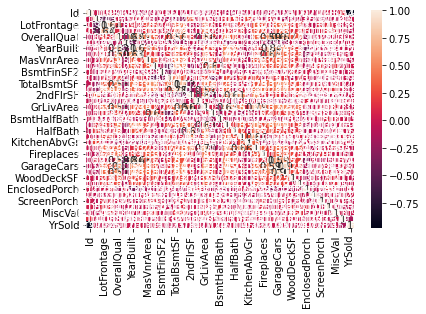

In [115]:
sns.heatmap(HouseDF.corr(), annot=True)

In [43]:
print('Linear Regression Coefficient:', linear_model.score(a_test,b_test))
MSE = np.square(np.subtract(b_test,b_LR)).mean()
print("Mean Squared Error:", MSE)

Linear Regression Coefficient: nan
Mean Squared Error: 0.007883642460820134


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [65]:
predict = linear_model.predict(test)
predicted['SalePrice'] = np.exp(predict)
predicted

,"(SalePrice, Id)",SalePrice
0,118008.722081,118008.722081
1,138252.712410,138252.712410
2,167545.679720,167545.679720
3,195155.892745,195155.892745
4,181910.582543,181910.582543
...,...,...
1454,95948.748559,95948.748559
1455,95784.964519,95784.964519
1456,177073.338328,177073.338328
1457,113608.453157,113608.453157
